### Problem statement

This dataset contains over 33,000 anonymized reviews of
McDonald's stores in the United States, scraped from Google reviews. 
It provides valuable insights into customer experiences and opinions about various McDonald's 
locations across the country. The dataset includes information such as store names, categories,
addresses, geographic coordinates, review ratings, review texts, and timestamps.

reviewer_id: Unique identifier for each reviewer (anonymized)

store_name: Name of the McDonald's store

category: Category or type of the store

store_address: Address of the store

latitude: Latitude coordinate of the store's location

longitude: Longitude coordinate of the store's location

rating_count: Number of ratings/reviews for the store

review_time: Timestamp of the review

review: Textual content of the review

rating: Rating provided by the reviewer

Potential Use Cases:
Sentiment analysis: Analyze the sentiment of reviews to understand overall customer satisfaction and identify areas for improvement.

Location-based analysis: Explore geographical patterns in reviews and ratings to identify high-performing or underperforming regions.

Category analysis: Investigate how different categories of McDonald's stores (e.g., drive-thru, McCafé) are perceived by customers.

Time-based analysis: Examine temporal trends in reviews to identify any shifts in customer opinions or preferences over time.

In [3]:
pip install twython

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,re
import docx2txt
import textract
import missingno as msno
import time
import operator
from colorama import Fore, init
import plotly.express as px

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin')

In [3]:
df

reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
...                                                  ...        ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   

       longitude rating_count   review_time  \
0     -97.792874        1,240  3 months ago   
1     -97.792874        1,240    5 days ago   
2     -97.792874        1,240    5 days ago   
3     -97.792874        1,240   a month ago   
4     -97.792874        1,240  2 months ago   
...          ...          ...           ...   
33391 -80.189098        2,810   4 years ago   
33392 -80.189098        2,810    a year ago   
33393 -80.189098        2,810    a year ago   
33394 -80.189098        2,810   5 years ago   
33395 -80.189098        2,810   2 years ago   

                                                  review   rating  
0      Why does it look like someone spit on my food?...   1 star  
1      It'd McDonalds. It is what it is as far as the...  4 stars  
2      Made a mobile order got to the speaker and che...   1 star  
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  
4      I repeat my order 3 times in the drive thru, a...   1 star  
...                                                  ...      ...  
33391                        They treated me very badly.   1 star  
33392                           The service is very good  5 stars  
33393                         To remove hunger is enough  4 stars  
33394  It's good, but lately it has become very expen...  5 stars  
33395                          they took good care of me  5 stars  

[33396 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
df.duplicated().sum()

0

<AxesSubplot:>

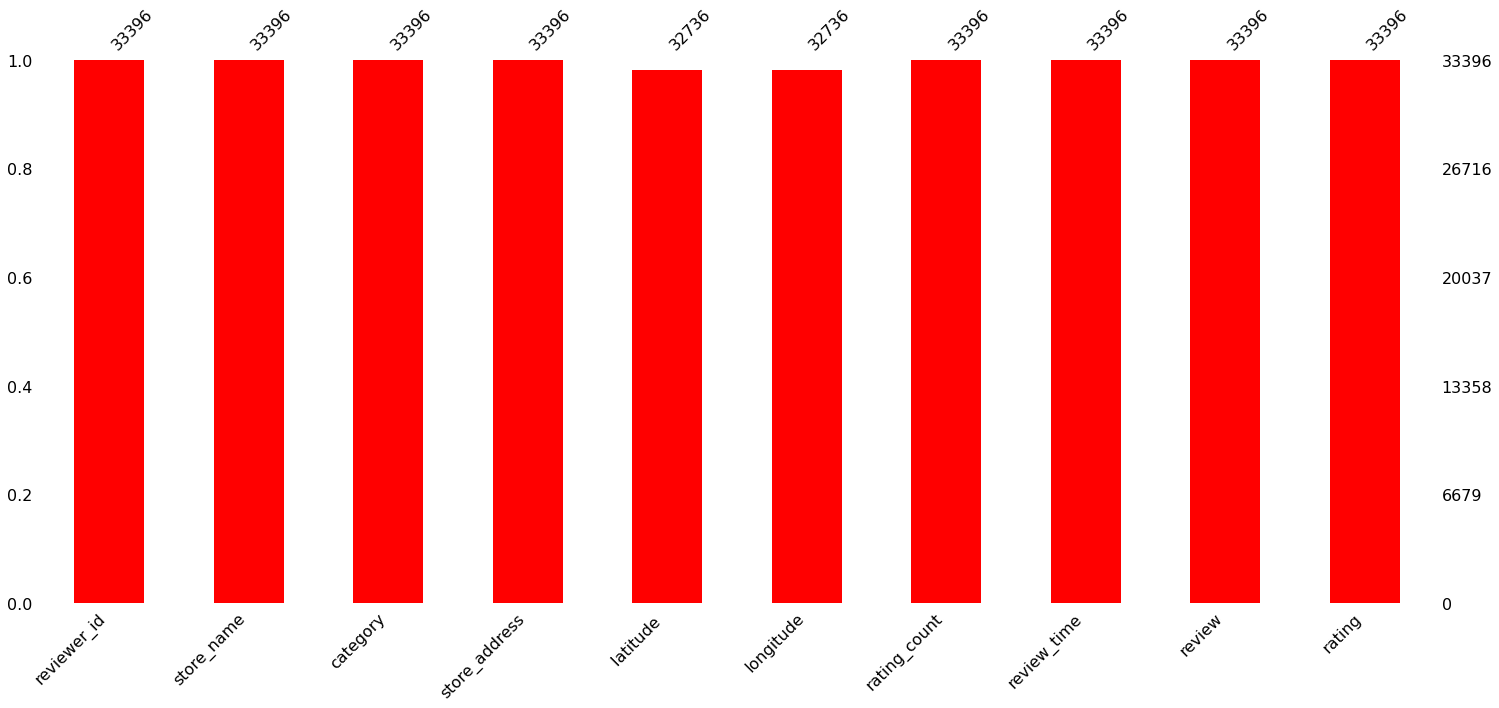

In [6]:
msno.bar(df, color = 'r')

In [7]:
df[df.isnull().any(axis = 1)]

reviewer_id     store_name              category  \
22141        22142     McDonald's  Fast food restaurant   
22142        22143     McDonald's  Fast food restaurant   
22143        22144     McDonald's  Fast food restaurant   
22144        22145     McDonald's  Fast food restaurant   
22145        22146     McDonald's  Fast food restaurant   
...            ...            ...                   ...   
27719        27720  ýýýMcDonald's  Fast food restaurant   
27720        27721     McDonald's  Fast food restaurant   
27721        27722     McDonald's  Fast food restaurant   
27722        27723     McDonald's  Fast food restaurant   
27723        27724     McDonald's  Fast food restaurant   

                                           store_address  latitude   \
22141  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
22142  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
22143  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
22144  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
22145  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
...                                                  ...        ...   
27719  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
27720  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
27721  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
27722  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   
27723  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...        NaN   

       longitude rating_count    review_time  \
22141        NaN        2,175   3 months ago   
22142        NaN        2,175     a year ago   
22143        NaN        2,175    2 weeks ago   
22144        NaN        2,175    a month ago   
22145        NaN        2,175   2 months ago   
...          ...          ...            ...   
27719        NaN        2,175    3 years ago   
27720        NaN        2,175  11 months ago   
27721        NaN        2,175  11 months ago   
27722        NaN        2,175  11 months ago   
27723        NaN        2,175   8 months ago   

                                                  review   rating  
22141  Breakfast specials are good. The sausage burri...  4 stars  
22142  This isn't your typical McDonald's. This place...  5 stars  
22143  This place was serving good quality breakfast ...  4 stars  
22144  I understand this is a very busy location but ...   1 star  
22145  When I arrived at McDonald's, it was very crow...  4 stars  
...                                                  ...      ...  
27719  This McDonald's is across the street from Waik...  5 stars  
27720  Seems like, they always makes some mistakes wh...  2 stars  
27721  Convenient to the east end of Kalakaua Ave. Lo...  4 stars  
27722  Lost McDonald's in Honolulu, if you can avoid ...   1 star  
27723  Everytime I visit Waikiki for a vacation this ...   1 star  

[660 rows x 10 columns]

In [8]:
df = df.dropna()

In [9]:
df1 = df.copy()

In [10]:
# Drop columns 'store_name', 'category', 'latitude', 'longitude', and 'rating_count'
df1 = df1.drop(columns=['reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [11]:
df1

store_address   review_time  \
0      13749 US-183 Hwy, Austin, TX 78750, United States  3 months ago   
1      13749 US-183 Hwy, Austin, TX 78750, United States    5 days ago   
2      13749 US-183 Hwy, Austin, TX 78750, United States    5 days ago   
3      13749 US-183 Hwy, Austin, TX 78750, United States   a month ago   
4      13749 US-183 Hwy, Austin, TX 78750, United States  2 months ago   
...                                                  ...           ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...   4 years ago   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...    a year ago   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...    a year ago   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...   5 years ago   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...   2 years ago   

                                                  review   rating  
0      Why does it look like someone spit on my food?...   1 star  
1      It'd McDonalds. It is what it is as far as the...  4 stars  
2      Made a mobile order got to the speaker and che...   1 star  
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  
4      I repeat my order 3 times in the drive thru, a...   1 star  
...                                                  ...      ...  
33391                        They treated me very badly.   1 star  
33392                           The service is very good  5 stars  
33393                         To remove hunger is enough  4 stars  
33394  It's good, but lately it has become very expen...  5 stars  
33395                          they took good care of me  5 stars  

[32736 rows x 4 columns]

In [12]:
df1[['store_address']].sample(5)

store_address
8970   210 5th S, Salt Lake City, UT 84106, United St...
17066  10901 Riverside Dr, North Hollywood, CA 91602,...
17236  702-2 Haddonfield-Berlin Rd, Voorhees Township...
31123  632 S R L Thornton Freeway Service Rd, Dallas,...
15444       8500 US-290, Austin, TX 78724, United States

In [13]:
df1[['City', 'State']] = df1['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [14]:
df1[['City','State']].sample(5)

City     State
2070      Queens  NY 11367
18710    Roanoke  TX 76262
30847    Orlando  FL 32819
445       Austin  TX 78750
11239  San Diego  CA 92109

In [15]:
df1 = df1.drop(columns=['store_address'])

In [16]:
df1.insert(5, "Star", df1["rating"].str.split(" ").str[0])

In [17]:
df1

review_time                                             review  \
0      3 months ago  Why does it look like someone spit on my food?...   
1        5 days ago  It'd McDonalds. It is what it is as far as the...   
2        5 days ago  Made a mobile order got to the speaker and che...   
3       a month ago  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4      2 months ago  I repeat my order 3 times in the drive thru, a...   
...             ...                                                ...   
33391   4 years ago                        They treated me very badly.   
33392    a year ago                           The service is very good   
33393    a year ago                         To remove hunger is enough   
33394   5 years ago  It's good, but lately it has become very expen...   
33395   2 years ago                          they took good care of me   

        rating    City     State Star  
0       1 star  Austin  TX 78750    1  
1      4 stars  Austin  TX 78750    4  
2       1 star  Austin  TX 78750    1  
3      5 stars  Austin  TX 78750    5  
4       1 star  Austin  TX 78750    1  
...        ...     ...       ...  ...  
33391   1 star   Miami  FL 33137    1  
33392  5 stars   Miami  FL 33137    5  
33393  4 stars   Miami  FL 33137    4  
33394  5 stars   Miami  FL 33137    5  
33395  5 stars   Miami  FL 33137    5  

[32736 rows x 6 columns]

In [18]:
df1 = df1.drop(columns=['rating'])

In [19]:
df1

review_time                                             review  \
0      3 months ago  Why does it look like someone spit on my food?...   
1        5 days ago  It'd McDonalds. It is what it is as far as the...   
2        5 days ago  Made a mobile order got to the speaker and che...   
3       a month ago  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4      2 months ago  I repeat my order 3 times in the drive thru, a...   
...             ...                                                ...   
33391   4 years ago                        They treated me very badly.   
33392    a year ago                           The service is very good   
33393    a year ago                         To remove hunger is enough   
33394   5 years ago  It's good, but lately it has become very expen...   
33395   2 years ago                          they took good care of me   

         City     State Star  
0      Austin  TX 78750    1  
1      Austin  TX 78750    4  
2      Austin  TX 78750    1  
3      Austin  TX 78750    5  
4      Austin  TX 78750    1  
...       ...       ...  ...  
33391   Miami  FL 33137    1  
33392   Miami  FL 33137    5  
33393   Miami  FL 33137    4  
33394   Miami  FL 33137    5  
33395   Miami  FL 33137    5  

[32736 rows x 5 columns]

In [20]:
unique_review = df1['review'].unique()
unique_review

array(['Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.',
       "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",
       'Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day  and the manager told me she wasnï¿',
       ..., 'To remove hunger is enough',
       "I

In [21]:
# Removing other unwanted text
import string

def clean_text(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()
 
    return review


df1['clean_reviews'] = df1['review'].apply(clean_text)

print(df1[['clean_reviews']])
df1.head()

                                           clean_reviews
0      why does it look like someone spit on my food ...
1      itd mcdonalds it is what it is as far as the f...
2      made a mobile order got to the speaker and che...
3      my mc crispy chicken sandwich was customer ser...
4      i repeat my order times in the drive thru and ...
...                                                  ...
33391                         they treated me very badly
33392                           the service is very good
33393                         to remove hunger is enough
33394   its good but lately it has become very expensive
33395                          they took good care of me

[32736 rows x 1 columns]


review_time                                             review    City  \
0  3 months ago  Why does it look like someone spit on my food?...  Austin   
1    5 days ago  It'd McDonalds. It is what it is as far as the...  Austin   
2    5 days ago  Made a mobile order got to the speaker and che...  Austin   
3   a month ago  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  Austin   
4  2 months ago  I repeat my order 3 times in the drive thru, a...  Austin   

      State Star                                      clean_reviews  
0  TX 78750    1  why does it look like someone spit on my food ...  
1  TX 78750    4  itd mcdonalds it is what it is as far as the f...  
2  TX 78750    1  made a mobile order got to the speaker and che...  
3  TX 78750    5  my mc crispy chicken sandwich was customer ser...  
4  TX 78750    1  i repeat my order times in the drive thru and ...

In [22]:
df1 = df1.drop(columns=['review'])

In [23]:
df1

review_time    City     State Star  \
0      3 months ago  Austin  TX 78750    1   
1        5 days ago  Austin  TX 78750    4   
2        5 days ago  Austin  TX 78750    1   
3       a month ago  Austin  TX 78750    5   
4      2 months ago  Austin  TX 78750    1   
...             ...     ...       ...  ...   
33391   4 years ago   Miami  FL 33137    1   
33392    a year ago   Miami  FL 33137    5   
33393    a year ago   Miami  FL 33137    4   
33394   5 years ago   Miami  FL 33137    5   
33395   2 years ago   Miami  FL 33137    5   

                                           clean_reviews  
0      why does it look like someone spit on my food ...  
1      itd mcdonalds it is what it is as far as the f...  
2      made a mobile order got to the speaker and che...  
3      my mc crispy chicken sandwich was customer ser...  
4      i repeat my order times in the drive thru and ...  
...                                                  ...  
33391                         they treated me very badly  
33392                           the service is very good  
33393                         to remove hunger is enough  
33394   its good but lately it has become very expensive  
33395                          they took good care of me  

[32736 rows x 5 columns]

In [24]:
import colorama
from colorama import Fore

colorama.init()

def display_unique_and_top_values(df1, columns):
   
    
    for col in columns:  # The colon was missing here
        total_unique_values = df1[col].nunique()
        print(f'Total unique values for {col}: {total_unique_values}')
        
        top_values = df1[col].value_counts().items()
        colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

        # Using enumerate and colors in one line with list comprehension
        [print(f'{colors[i % len(colors)]}{value}: {count}{Fore.RESET}') for i, (value, count) in enumerate(top_values)]
        
        print('\n' + '=' * 30 + '\n')

# Call the function
specified_columns = ['City', 'State', 'review_time', 'Star']
display_unique_and_top_values(df1, specified_columns)


Total unique values for City: 26
New York: 3486
Orlando: 3090
Austin: 1726
Kissimmee: 1720
North Hollywood: 1710
Fern Park: 1700
Dallas: 1650
Miami: 1570
Newark: 1290
San Diego: 1230
Roanoke: 1168
Queens: 1140
Los Angeles: 1034
Las Vegas: 1030
Brodheadsville: 1028
Voorhees Township: 943
Salt Lake City: 890
Fort Worth: 850
Santa Monica: 820
Sunnyvale: 800
Oak Park: 751
Washington: 683
San Antonio: 635
Champlain: 620
Annandale: 602
Miami Beach: 570


Total unique values for State: 36
FL 32819: 2380
NY 10001: 2070
FL 34746: 1720
CA 91602: 1710
FL 32730: 1700
TX 75203: 1650
FL 33137: 1570
NJ 07104: 1290
TX 76262: 1168
NY 11367: 1140
NY 10003: 1140
NV 89119: 1030
PA 18322: 1028
NJ 08043: 943
TX 78724: 926
UT 84106: 890
TX 76177: 850
CA 90405: 820
TX 78750: 800
CA 94086: 800
IL 60302: 751
FL 32837: 710
DC 20036: 680
CA 92109: 680
TX 78257: 635
NY 12919: 620
VA 22003: 602
FL 33139: 570
CA 90021: 550
CA 92111: 550
CA 90044: 481
NY 10013: 270
NY 10002: 3
CA 90025: 3
DC 20004: 3
NY 10038: 3


To

## EDA

In [26]:
df2 = df1.copy()

In [27]:
df2

review_time    City     State Star  \
0      3 months ago  Austin  TX 78750    1   
1        5 days ago  Austin  TX 78750    4   
2        5 days ago  Austin  TX 78750    1   
3       a month ago  Austin  TX 78750    5   
4      2 months ago  Austin  TX 78750    1   
...             ...     ...       ...  ...   
33391   4 years ago   Miami  FL 33137    1   
33392    a year ago   Miami  FL 33137    5   
33393    a year ago   Miami  FL 33137    4   
33394   5 years ago   Miami  FL 33137    5   
33395   2 years ago   Miami  FL 33137    5   

                                           clean_reviews  
0      why does it look like someone spit on my food ...  
1      itd mcdonalds it is what it is as far as the f...  
2      made a mobile order got to the speaker and che...  
3      my mc crispy chicken sandwich was customer ser...  
4      i repeat my order times in the drive thru and ...  
...                                                  ...  
33391                         they treated me very badly  
33392                           the service is very good  
33393                         to remove hunger is enough  
33394   its good but lately it has become very expensive  
33395                          they took good care of me  

[32736 rows x 5 columns]

In [28]:
##Bivariate Analysis

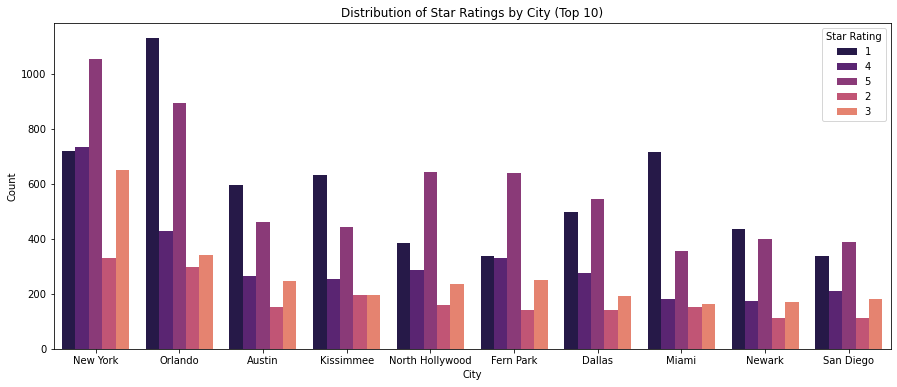

In [29]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='City', hue='Star', data=df2, order=df2['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

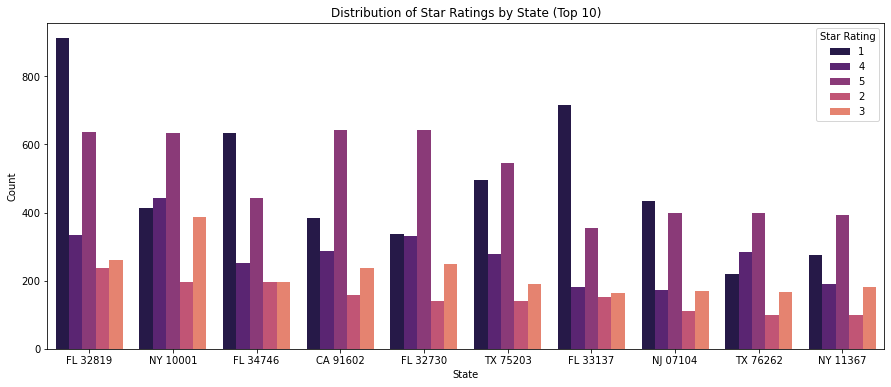

In [30]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='State', hue='Star', data=df2, order=df2['State'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

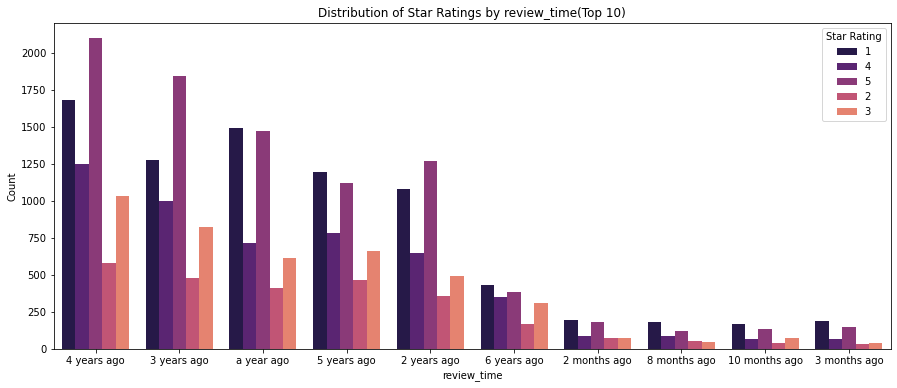

In [31]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='review_time', hue='Star', data=df2, order=df2['review_time'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by review_time(Top 10)')
plt.xlabel('review_time')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

##  Data Preprocessing

In [33]:
df3 = df2.copy()

In [34]:
df3 = df3[["Star","clean_reviews"]]
df3.head(5)

Star                                      clean_reviews
0    1  why does it look like someone spit on my food ...
1    4  itd mcdonalds it is what it is as far as the f...
2    1  made a mobile order got to the speaker and che...
3    5  my mc crispy chicken sandwich was customer ser...
4    1  i repeat my order times in the drive thru and ...

In [35]:
analyzer = SentimentIntensityAnalyzer()
df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df3[['clean_reviews', 'sentiment_score', 'sentiment']].head())

                                       clean_reviews  sentiment_score  \
0  why does it look like someone spit on my food ...           0.5215   
1  itd mcdonalds it is what it is as far as the f...           0.8687   
2  made a mobile order got to the speaker and che...          -0.3535   
3  my mc crispy chicken sandwich was customer ser...           0.0000   
4  i repeat my order times in the drive thru and ...          -0.8020   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


### Word count

In [37]:
# Tokenization,Stammimg and Removing stopwords,punctuations
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+ ['the','and','to','was','is','they','it','for','in','food',
                                                                       'of']

# tokenize
df3['NC_text'] = [nltk.word_tokenize(x) for x in df3['clean_reviews']]

# stopword removal
df3['NC_text'] = df3['NC_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
df3['NC_text'] = df3['NC_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df3['NC_text'] = df3['NC_text'].apply(lambda x: ' '.join(x))
df3.head()

Star                                      clean_reviews  sentiment_score  \
0    1  why does it look like someone spit on my food ...           0.5215   
1    4  itd mcdonalds it is what it is as far as the f...           0.8687   
2    1  made a mobile order got to the speaker and che...          -0.3535   
3    5  my mc crispy chicken sandwich was customer ser...           0.0000   
4    1  i repeat my order times in the drive thru and ...          -0.8020   

  sentiment                                            NC_text  
0  positive  look like someon spit normal transact everyon ...  
1  positive  itd mcdonald far atmospher go staff make diffe...  
2  negative  made mobil order got speaker check line move l...  
3   neutral   mc crispi chicken sandwich custom servic quick p  
4  negative  repeat order time drive thru still manag mess ...

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9, stop_words='english')
X = vectorizer.fit_transform(df3["NC_text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head()

term  occurrences  frequency
0     aa            4   0.000012
1    aaa            1   0.000003
2  aaaah            2   0.000006
3  aaand            2   0.000006
4    aak            1   0.000003

#### Unigram 

In [40]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
NC_text_column = df3["NC_text"]
top1_words = get_top_n1_words(NC_text_column, n=200)
top1_df = pd.DataFrame(top1_words, columns=['uni-gram', 'Freq'])
top1_df.head(20)

uni-gram  Freq
0      order  8999
1   mcdonald  6351
2     servic  6191
3       good  5474
4        get  3830
5      place  3641
6       time  3429
7       wait  3098
8         go  2966
9      drive  2884
10       one  2770
11      like  2657
12      fast  2622
13     excel  2537
14    custom  2422
15     staff  2395
16     alway  2271
17     great  2245
18     manag  2178
19     clean  2145

#### Bi gram 

In [43]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
NC_text_column = df3["NC_text"]
top2_words = get_top_n2_words(df3["NC_text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words, columns=['bi-gram', 'Freq'])
top2_df.head(11)

bi-gram  Freq
0       drive thru  1664
1    custom servic  1125
2        get order   515
3      fast servic   486
4       take order   465
5       wait minut   453
6      good servic   444
7   worst mcdonald   427
8      order wrong   403
9        ice cream   368
10    great servic   322

#### Tigram

In [46]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [47]:
NC_text_column = df3["NC_text"]
top3_words = get_top_n3_words(NC_text_column , n=200)
top3_df =  pd.DataFrame(top3_words, columns=['ti-gram', 'Freq'])
top3_df.head(11)

ti-gram  Freq
0     mcdonald ive ever   169
1       get order right   154
2   worst mcdonald ever   147
3   great custom servic   114
4       got order wrong   109
5       drive thru line    98
6    worst mcdonald ive    96
7      ice cream machin    92
8       get order wrong    90
9    good custom servic    86
10      wait drive thru    75

## Words with the biggest contribution in Sentiment

In [49]:
df3['temp_list'] = df3['NC_text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='PuBu')

In [50]:
df3['temp_list'] = df3['NC_text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [51]:
Positive_sent = df3[df3['sentiment'] == 'positive']
Negative_sent = df3[df3['sentiment'] == 'negative']
Neutral_sent = df3[df3['sentiment'] == 'neutral']

In [52]:
Positive_sent

Star                                      clean_reviews  \
0        1  why does it look like someone spit on my food ...   
1        4  itd mcdonalds it is what it is as far as the f...   
7        1  came in and ordered a large coffee wno ice the...   
9        4  im not really a huge fan of fast food but i ha...   
19       4  the staff seems to always be different which m...   
...    ...                                                ...   
33388    5                       all very good food attention   
33390    5                                          very well   
33392    5                           the service is very good   
33394    5   its good but lately it has become very expensive   
33395    5                          they took good care of me   

       sentiment_score sentiment  \
0               0.5215  positive   
1               0.8687  positive   
7               0.1027  positive   
9               0.9942  positive   
19              0.6953  positive   
...                ...       ...   
33388           0.4927  positive   
33390           0.3384  positive   
33392           0.4927  positive   
33394           0.2382  positive   
33395           0.7269  positive   

                                                 NC_text  \
0      look like someon spit normal transact everyon ...   
1      itd mcdonald far atmospher go staff make diffe...   
7      came order larg coffe wno ice hand cup less ha...   
9      im realli huge fan fast teenag daughter enjoy ...   
19     staff seem alway differ make order sometim lit...   
...                                                  ...   
33388                                        good attent   
33390                                               well   
33392                                        servic good   
33394                             good late becom expens   
33395                                     took good care   

                                               temp_list  
0      [look, like, someon, spit, normal, transact, e...  
1      [itd, mcdonald, far, atmospher, go, staff, mak...  
7      [came, order, larg, coffe, wno, ice, hand, cup...  
9      [im, realli, huge, fan, fast, teenag, daughter...  
19     [staff, seem, alway, differ, make, order, some...  
...                                                  ...  
33388                                     [good, attent]  
33390                                             [well]  
33392                                     [servic, good]  
33394                        [good, late, becom, expens]  
33395                                 [took, good, care]  

[17087 rows x 6 columns]

## Words on Positive statement

In [54]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

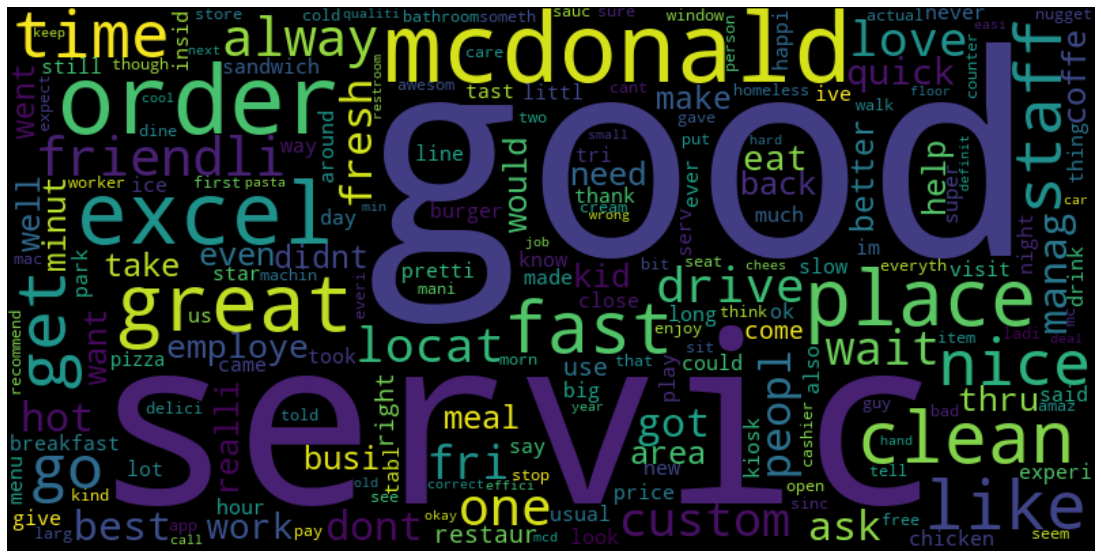

In [55]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])
wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## words in netural statement

In [57]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

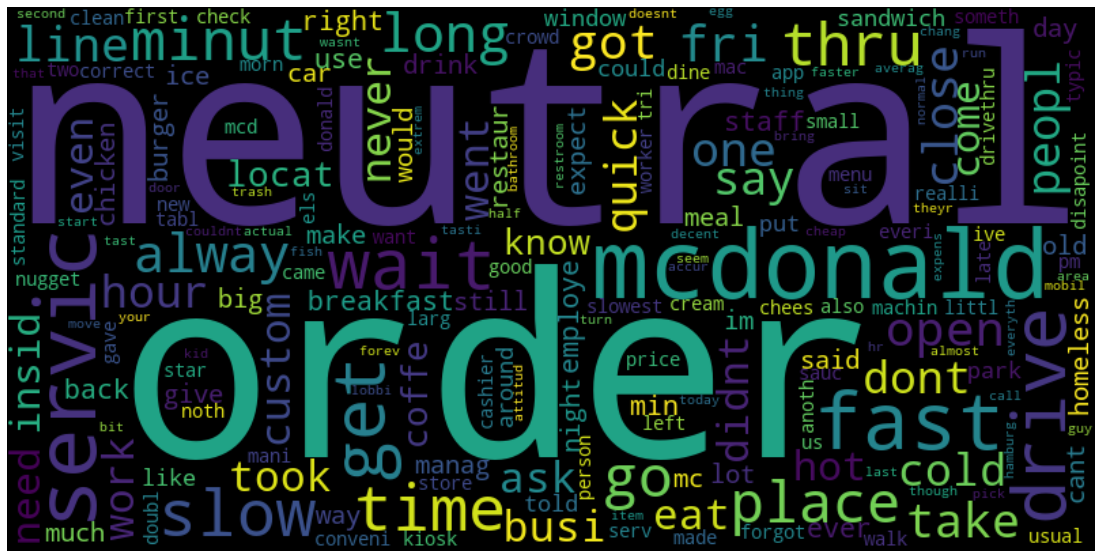

In [58]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])
wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Words in Negative Statement

In [60]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

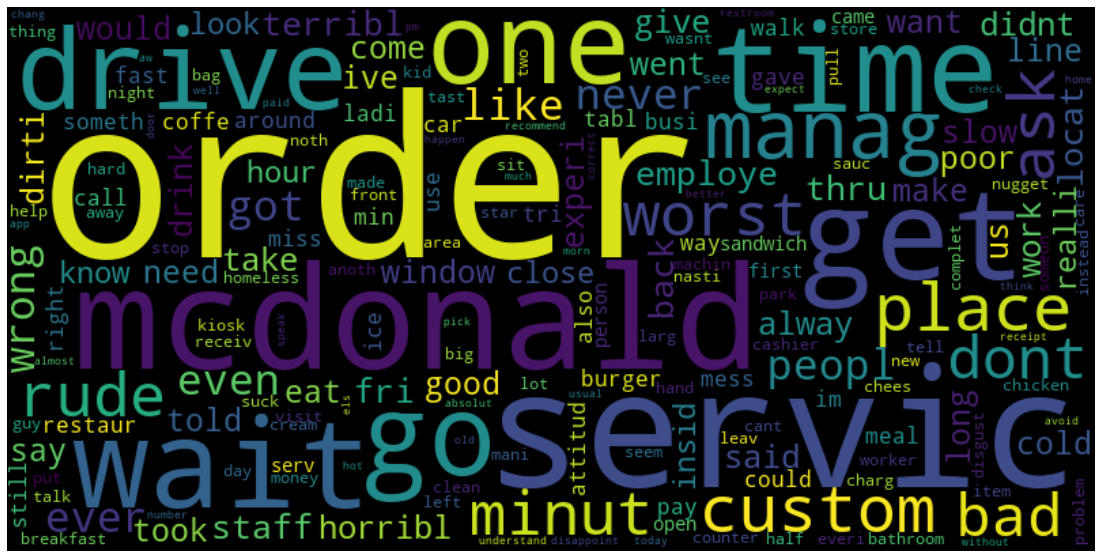

In [61]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])
wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [62]:
df3

Star                                      clean_reviews  \
0        1  why does it look like someone spit on my food ...   
1        4  itd mcdonalds it is what it is as far as the f...   
2        1  made a mobile order got to the speaker and che...   
3        5  my mc crispy chicken sandwich was customer ser...   
4        1  i repeat my order times in the drive thru and ...   
...    ...                                                ...   
33391    1                         they treated me very badly   
33392    5                           the service is very good   
33393    4                         to remove hunger is enough   
33394    5   its good but lately it has become very expensive   
33395    5                          they took good care of me   

       sentiment_score sentiment  \
0               0.5215  positive   
1               0.8687  positive   
2              -0.3535  negative   
3               0.0000   neutral   
4              -0.8020  negative   
...                ...       ...   
33391          -0.5256  negative   
33392           0.4927  positive   
33393          -0.2500  negative   
33394           0.2382  positive   
33395           0.7269  positive   

                                                 NC_text  \
0      look like someon spit normal transact everyon ...   
1      itd mcdonald far atmospher go staff make diffe...   
2      made mobil order got speaker check line move l...   
3       mc crispi chicken sandwich custom servic quick p   
4      repeat order time drive thru still manag mess ...   
...                                                  ...   
33391                                        treat badli   
33392                                        servic good   
33393                                remov hunger enough   
33394                             good late becom expens   
33395                                     took good care   

                                               temp_list  
0      [look, like, someon, spit, normal, transact, e...  
1      [itd, mcdonald, far, atmospher, go, staff, mak...  
2      [made, mobil, order, got, speaker, check, line...  
3      [mc, crispi, chicken, sandwich, custom, servic...  
4      [repeat, order, time, drive, thru, still, mana...  
...                                                  ...  
33391                                     [treat, badli]  
33392                                     [servic, good]  
33393                            [remov, hunger, enough]  
33394                        [good, late, becom, expens]  
33395                                 [took, good, care]  

[32736 rows x 6 columns]

## Split Data

In [64]:
df4 = df3.copy()

In [65]:
x = df4['clean_reviews']
y = df4['sentiment']

In [66]:
x

0        why does it look like someone spit on my food ...
1        itd mcdonalds it is what it is as far as the f...
2        made a mobile order got to the speaker and che...
3        my mc crispy chicken sandwich was customer ser...
4        i repeat my order times in the drive thru and ...
                               ...                        
33391                           they treated me very badly
33392                             the service is very good
33393                           to remove hunger is enough
33394     its good but lately it has become very expensive
33395                            they took good care of me
Name: clean_reviews, Length: 32736, dtype: object

In [67]:
y

0        positive
1        positive
2        negative
3         neutral
4        negative
           ...   
33391    negative
33392    positive
33393    negative
33394    positive
33395    positive
Name: sentiment, Length: 32736, dtype: object

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
x_train

7571                                                 great
6350     this mcdonalds is excelent to observe nycs nig...
14759    open till am change your posted hours or stay ...
19969                                             terrible
9926                                             excellent
                               ...                        
30462    took mins to pick up my mobile order ppl worki...
5390     why is it sooooooo hot inside the restaurant i...
860      was able to get dinner in just under minutes f...
15795       the manger was so very rude and service sticks
24304    easily the worst fast food experience my girlf...
Name: clean_reviews, Length: 26188, dtype: object

## Model Buliding

#### Multinomial Naive Bayes Classifier

In [70]:
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [71]:
nb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [72]:
nb_predictions = nb_pipeline.predict(x_test)

In [73]:
print("Multinomial Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))

Multinomial Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.77      0.81      0.79      1951
     neutral       0.99      0.22      0.36      1172
    positive       0.75      0.93      0.83      3425

    accuracy                           0.77      6548
   macro avg       0.84      0.65      0.66      6548
weighted avg       0.80      0.77      0.73      6548



#### Support Vector Classifier

In [74]:
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())

In [75]:
svc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [76]:
svc_predictions = svc_pipeline.predict(x_test)
print("Support Vector Classifier:")
print(classification_report(y_test, svc_predictions))

Support Vector Classifier:
              precision    recall  f1-score   support

    negative       0.87      0.88      0.88      1951
     neutral       0.91      0.89      0.90      1172
    positive       0.94      0.94      0.94      3425

    accuracy                           0.91      6548
   macro avg       0.91      0.90      0.91      6548
weighted avg       0.91      0.91      0.91      6548



#### Logistic Regreesion

In [77]:
logistic_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [78]:
logistic_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [80]:
logistic_predictions = logistic_pipeline.predict(x_test)
print("Logistic Regreesion:")
print(classification_report(y_test, logistic_predictions))

Logistic Regreesion:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      1951
     neutral       0.87      0.86      0.87      1172
    positive       0.92      0.93      0.93      3425

    accuracy                           0.89      6548
   macro avg       0.88      0.88      0.88      6548
weighted avg       0.89      0.89      0.89      6548



## The best accuracy gives Support vector Classifer is 0.91

### Cross validation

In [83]:
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())
cv_scores = cross_val_score(svc_pipeline, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.90721649 0.90530737 0.90492554 0.90185221 0.90013366]
Mean CV score: 0.9038870555887657
Standard deviation of CV scores: 0.0025459566413880935
